In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from ezekial import yahooprophet as yfp
yfp_obj = yfp.YahooProphet('BTC-USD', '2019-1-1', 90)
# yfp_obj.forecast_all()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


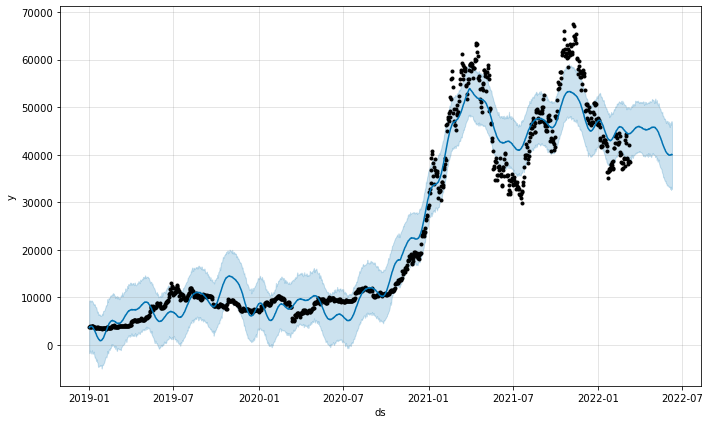

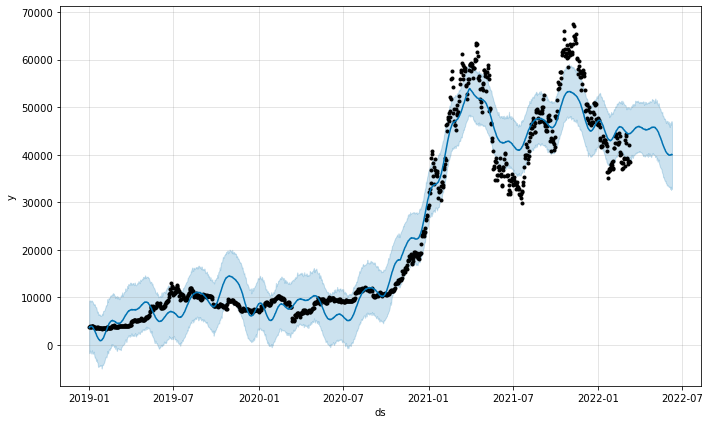

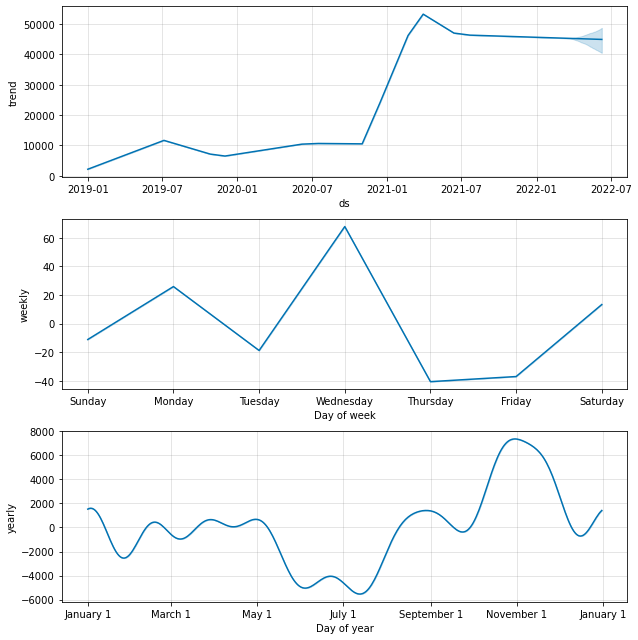

In [5]:
yfp_obj.plot()

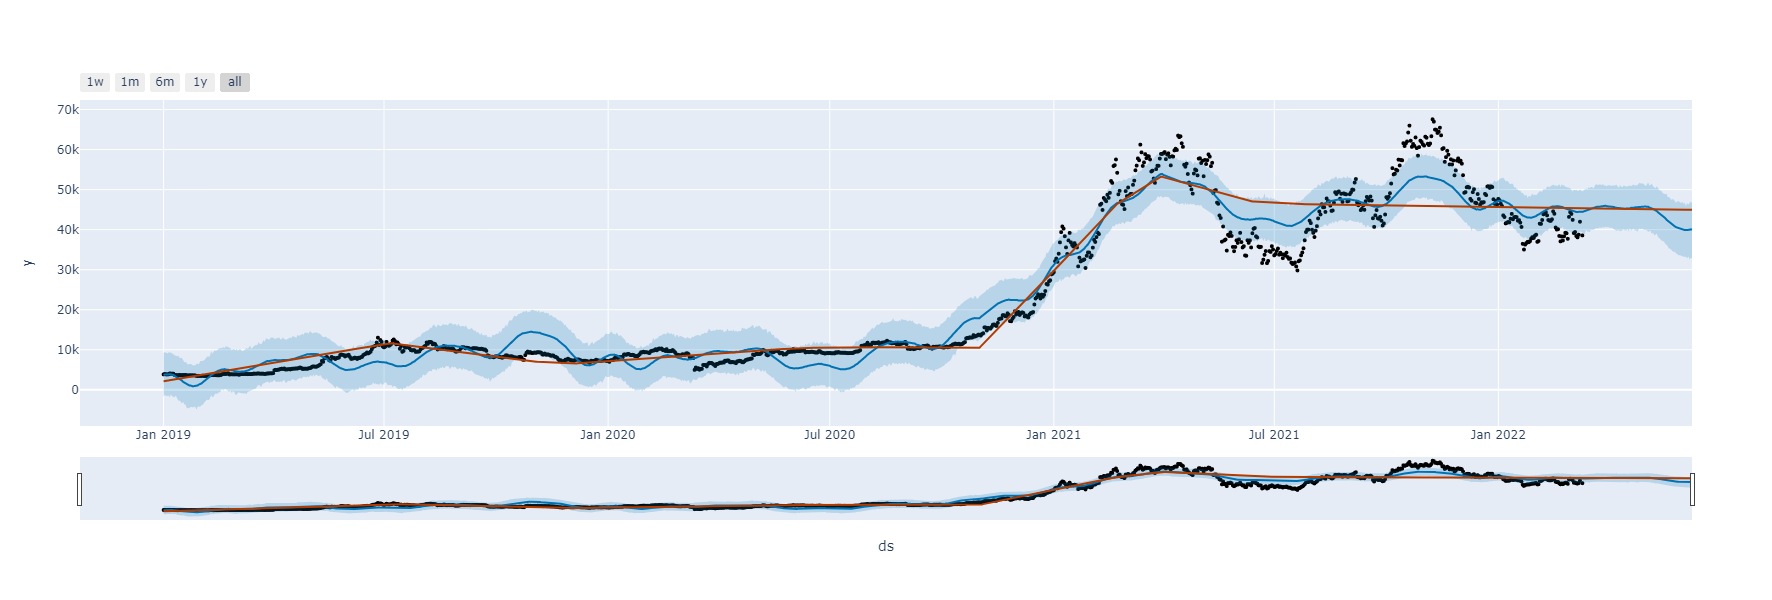

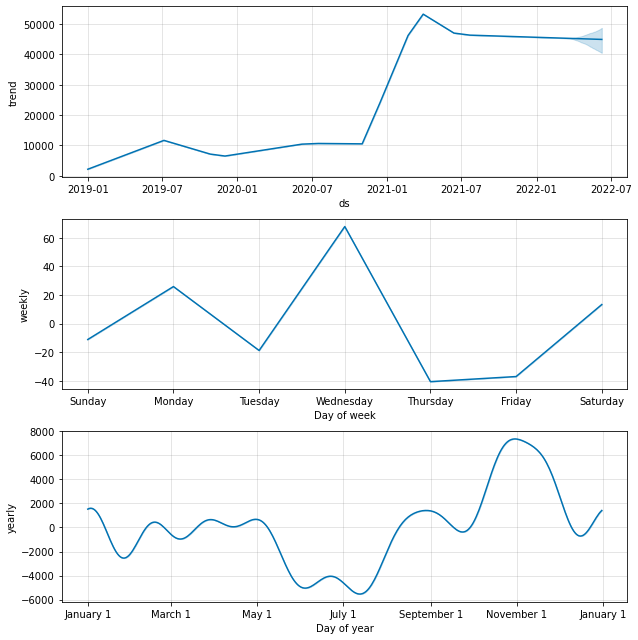

In [6]:
yfp_obj.plotly_plot()

In [7]:
yfp_obj.forecast_df().tail(91)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1164,2022-03-11,45337.842853,39381.042603,49531.552681,45337.842853,45337.842853,-902.314238,-902.314238,-902.314238,-36.926671,-36.926671,-36.926671,-865.387567,-865.387567,-865.387567,0.0,0.0,0.0,44435.528615
1165,2022-03-12,45333.462996,38773.318774,49802.351223,45333.462996,45333.462996,-785.131737,-785.131737,-785.131737,13.383157,13.383157,13.383157,-798.514894,-798.514894,-798.514894,0.0,0.0,0.0,44548.331259
1166,2022-03-13,45329.083139,38940.878396,50033.458619,45329.083139,45329.083139,-728.004687,-728.004687,-728.004687,-11.049338,-11.049338,-11.049338,-716.955349,-716.955349,-716.955349,0.0,0.0,0.0,44601.078452
1167,2022-03-14,45324.703282,39986.946799,50320.244183,45324.703282,45324.703282,-596.849386,-596.849386,-596.849386,25.939877,25.939877,25.939877,-622.789262,-622.789262,-622.789262,0.0,0.0,0.0,44727.853896
1168,2022-03-15,45320.323425,39475.650376,50005.511200,45320.323425,45320.323425,-537.088451,-537.088451,-537.088451,-18.726184,-18.726184,-18.726184,-518.362267,-518.362267,-518.362267,0.0,0.0,0.0,44783.234974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,2022-06-05,44961.175140,32821.066006,46636.319090,40813.844491,48382.858867,-5054.389475,-5054.389475,-5054.389475,-11.049338,-11.049338,-11.049338,-5043.340137,-5043.340137,-5043.340137,0.0,0.0,0.0,39906.785665
1251,2022-06-06,44956.795283,33297.549975,46261.276754,40743.778128,48499.186605,-4994.751632,-4994.751632,-4994.751632,25.939877,25.939877,25.939877,-5020.691508,-5020.691508,-5020.691508,0.0,0.0,0.0,39962.043651
1252,2022-06-07,44952.415426,32606.039304,46821.677951,40645.793009,48576.999706,-5001.391790,-5001.391790,-5001.391790,-18.726184,-18.726184,-18.726184,-4982.665606,-4982.665606,-4982.665606,0.0,0.0,0.0,39951.023636
1253,2022-06-08,44948.035569,32956.185634,47079.859615,40578.367016,48651.044779,-4863.336787,-4863.336787,-4863.336787,67.869072,67.869072,67.869072,-4931.205859,-4931.205859,-4931.205859,0.0,0.0,0.0,40084.698782


In [4]:
import pandas as pd
import yfinance as yf

In [5]:
yf_tickers = [
    'BTC-USD',
#     'ETH-USD',
#     'UDN'
]

In [6]:
start_date = '2019-01-01'

In [7]:
for x in range(len(yf_tickers)):
            if x == 0:
                df0 = yf.Ticker(yf_tickers[x]).history(start=start_date)['Close'].rename(yf_tickers[x])    
            else:
                df1 = yf.Ticker(yf_tickers[x]).history(start=start_date)['Close'].rename(yf_tickers[x])
                df0 = pd.concat([df0, df1], axis=1)
            
df0 = df0.fillna(method ='bfill')
df0 = df0.dropna()

In [8]:
df0

Date
2019-01-01     3843.520020
2019-01-02     3943.409424
2019-01-03     3836.741211
2019-01-04     3857.717529
2019-01-05     3845.194580
                  ...     
2022-01-01    47686.812500
2022-01-02    47345.218750
2022-01-03    46458.117188
2022-01-04    45897.574219
2022-01-05    46192.417969
Name: BTC-USD, Length: 1101, dtype: float64

In [11]:
df_prophet = pd.DataFrame()
df_prophet['y'] = df0
df_prophet['ds'] = df_prophet.index
df_prophet = df_prophet[['ds','y']]
df_prophet.reset_index(drop=True, inplace=True)

In [12]:
df_prophet

,ds,y
0,2019-01-01,3843.520020
1,2019-01-02,3943.409424
2,2019-01-03,3836.741211
3,2019-01-04,3857.717529
4,2019-01-05,3845.194580
...,...,...
1096,2022-01-01,47686.812500
1097,2022-01-02,47345.218750
1098,2022-01-03,46458.117188
1099,2022-01-04,45897.574219


In [13]:
# from ezekial.prophet import Prophet

In [14]:
# m = Prophet()

In [15]:
# m.fit(df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [16]:
# future = m.make_future_dataframe(periods=90)
# forecast = m.predict(future)

In [26]:
# forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01,-236.429703,-6154.717384,3038.021629,-236.429703,-236.429703,-1201.634253,-1201.634253,-1201.634253,-76.556353,-76.556353,-76.556353,-1125.077900,-1125.077900,-1125.077900,0.0,0.0,0.0,-1438.063956
1,2019-01-02,-182.067828,-5454.086875,3845.393350,-182.067828,-182.067828,-706.674752,-706.674752,-706.674752,12.409086,12.409086,12.409086,-719.083839,-719.083839,-719.083839,0.0,0.0,0.0,-888.742581
2,2019-01-03,-127.705953,-5089.891251,4510.779769,-127.705953,-127.705953,-348.980801,-348.980801,-348.980801,-17.399247,-17.399247,-17.399247,-331.581554,-331.581554,-331.581554,0.0,0.0,0.0,-476.686755
3,2019-01-04,-73.344078,-4515.683253,4874.490333,-73.344078,-73.344078,67.888478,67.888478,67.888478,35.853625,35.853625,35.853625,32.034853,32.034853,32.034853,0.0,0.0,0.0,-5.455600
4,2019-01-05,-18.982203,-3974.499431,4911.184332,-18.982203,-18.982203,405.954838,405.954838,405.954838,39.047371,39.047371,39.047371,366.907467,366.907467,366.907467,0.0,0.0,0.0,386.972635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,2022-04-01,63016.663763,59013.706061,71522.761960,59188.364105,66562.323304,2709.526020,2709.526020,2709.526020,35.853625,35.853625,35.853625,2673.672395,2673.672395,2673.672395,0.0,0.0,0.0,65726.189783
1187,2022-04-02,63086.789756,59046.678820,71778.449379,59142.627723,66680.253267,2773.268243,2773.268243,2773.268243,39.047371,39.047371,39.047371,2734.220872,2734.220872,2734.220872,0.0,0.0,0.0,65860.057999
1188,2022-04-03,63156.915748,59320.961814,72388.863842,59128.557795,66828.250063,2790.611843,2790.611843,2790.611843,9.130952,9.130952,9.130952,2781.480891,2781.480891,2781.480891,0.0,0.0,0.0,65947.527591
1189,2022-04-04,63227.041741,59224.083591,72501.970211,59112.723432,67014.742551,2813.463988,2813.463988,2813.463988,-2.485434,-2.485434,-2.485434,2815.949421,2815.949421,2815.949421,0.0,0.0,0.0,66040.505728


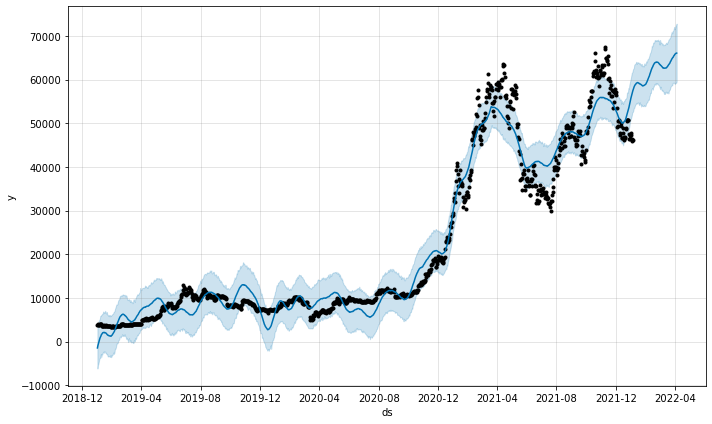

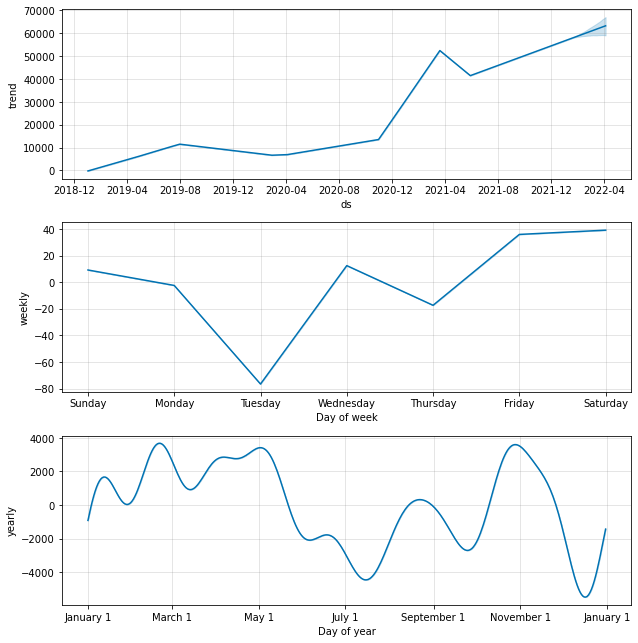

In [30]:
# fig1 = m.plot(forecast)
# fig2 = m.plot_components(forecast)